In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

# Add line profiler
%load_ext line_profiler

#Import packages we need
import numpy as np
from matplotlib import animation, rc
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import subprocess
import os
import gc
import datetime
import importlib
import logging
from socket import gethostname

import pycuda.driver as cuda
import pycuda.compiler

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
#Set large figure sizes
#Note, this prevents nice figures for articles...
rc('figure', figsize=(16.0, 12.0))
rc('animation', html='html5')

In [2]:
from GPUSimulators import Common, IPythonMagic, LxF, FORCE, HLL, HLL2, KP07, KP07_dimsplit, WAF, Autotuner

In [3]:
%setup_logging --out autotuning.log

Console logger using level INFO
File logger using level DEBUG to autotuning.log
Python version 3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [6]:
autotuner = Autotuner.Autotuner()

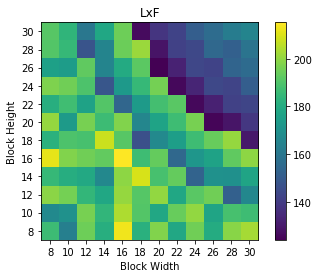

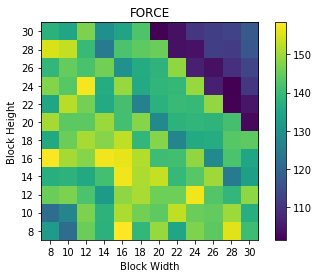

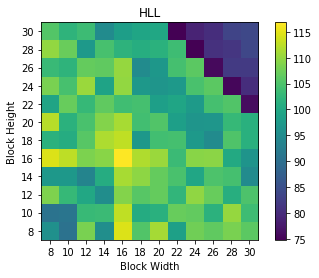

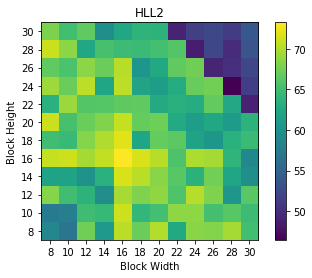

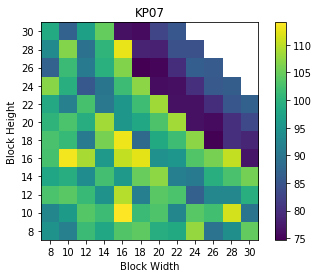

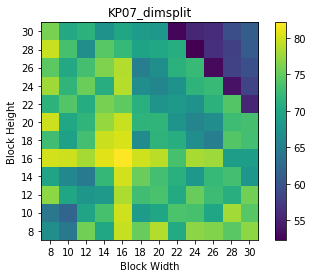

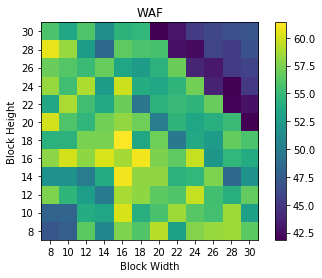

In [7]:
with np.load(autotuner.filename) as data:
    simulators = data['simulators']
    
    for simulator in simulators:
        megacells = data[simulator + "_megacells"]
        block_widths = data[simulator + '_block_widths']
        block_heights = data[simulator + '_block_heights']
        arguments = data[simulator + '_arguments']
        
        plt.figure()
        plt.imshow(megacells, origin='lower')#, vmax=maximum, vmin=minimum)
        plt.xlabel('Block Width')
        plt.xticks(range(len(block_widths)), block_widths)
        plt.ylabel('Block Height')
        plt.yticks(range(len(block_heights)), block_heights)
        plt.colorbar()
        plt.title(simulator)

Text(0.5,1,'Simulator performance (megacells)')

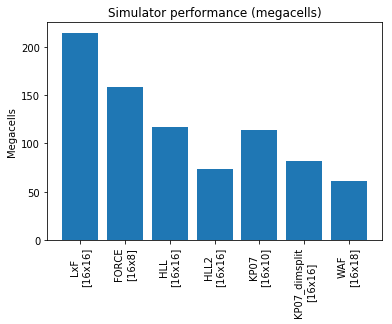

In [40]:
simulators = [LxF.LxF, FORCE.FORCE, HLL.HLL, HLL2.HLL2, KP07.KP07, KP07_dimsplit.KP07_dimsplit, WAF.WAF]
peak_performance = [autotuner.get_peak_performance(simulator) for simulator in simulators]
megacells = [performance['megacells'] for performance in peak_performance]
xlabels = ["{:s}\n[{:d}x{:d}]".format(simulators[i].__name__, performance['block_width'], performance['block_height']) for i, performance in enumerate(peak_performance)]

plt.figure()
plt.bar(range(len(simulators)), megacells)
plt.xticks(range(len(simulators)), xlabels, rotation=90)
plt.ylabel("Megacells")
plt.title("Simulator performance (megacells)")